In [216]:
# input_file = './data/input/86266.csv'
input_file = './data/input/63.csv'
output_file = './data/output/output.csv'
baseline_length = 1500 # 86266 = 1000
system_latency = 0

command = f"python3 __main__.py {input_file} {output_file} {baseline_length} {system_latency}"
!{command}


Number of rows: 70 , Baseline length: 1500 , samples: ( 30 )

Resampling baseline length from 1500 to 500 ms...
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples will be removed
Resampling trace: 60 samples wil

In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


def convert_string_to_array(string):
    return np.fromstring(string.strip("[]"), sep=',')


def build_x_trace(length: int):
    MS_PER_FRAME = 1 / 60 * 1000  # milliseconds per frame
    return np.arange(0, length * MS_PER_FRAME, MS_PER_FRAME)


def plot_median(data, y_column, split_by, y_min=-0.1, y_max=1):
    plt.figure(figsize=(20, 4))
    plt.ylim(y_min, y_max)
    plt.title(y_column)
    plot_df = data.copy()
    plot_df = plot_df.dropna(subset=[y_column])
    plot_df[y_column] = plot_df[y_column].apply(convert_string_to_array)

    max_length = max(plot_df[y_column].apply(len))
    x_trace = build_x_trace(max_length)

    for unique_value, unique_df in plot_df.groupby(split_by):
        if not unique_df.empty:
            padded_arrays = []
            for array in unique_df[y_column]:
                padding = max_length - len(array)
                padded_array = np.pad(array, (0, padding), 'constant', constant_values=np.NaN)
                padded_arrays.append(padded_array)

            label = unique_df['label'].iloc[0]
            stacked = np.stack(padded_arrays)
            median_values = np.nanmedian(stacked, axis=0)
            mean_values = np.nanmean(stacked, axis=0)

            for eye_trace in padded_arrays:
                plt.plot(x_trace, eye_trace, color='lightgray', alpha=0.6)

            plt.plot(x_trace, median_values, label=f'Median {label}', linewidth=2)
            # plt.plot(x_trace, mean_values, label=f'Mean {label}', linewidth=2)

    plt.legend()
    plt.show()

In [218]:
df = pd.read_csv('./data/output/output.csv')

print(df.columns.tolist())

['proto_trial_content', 'proto_trial_hash', 'eye_lid_trace_leftEyeTrace', 'trial_sortOrder', 'session_trials_id', 'label', 'eye_trace', 'baseline_frames', 'nan_percentage', 'trace_length', 'min_trace_length', 'max_trace_length', 'interpolated_trace', 'filtered_trace', 'first_baseline_corrected_trace', 'first_normalized_trace', 'normalized_trace', 'second_baseline_corrected_trace', 'second_baseline_corrected_trace_removed_outliers', 'baseline_trace']


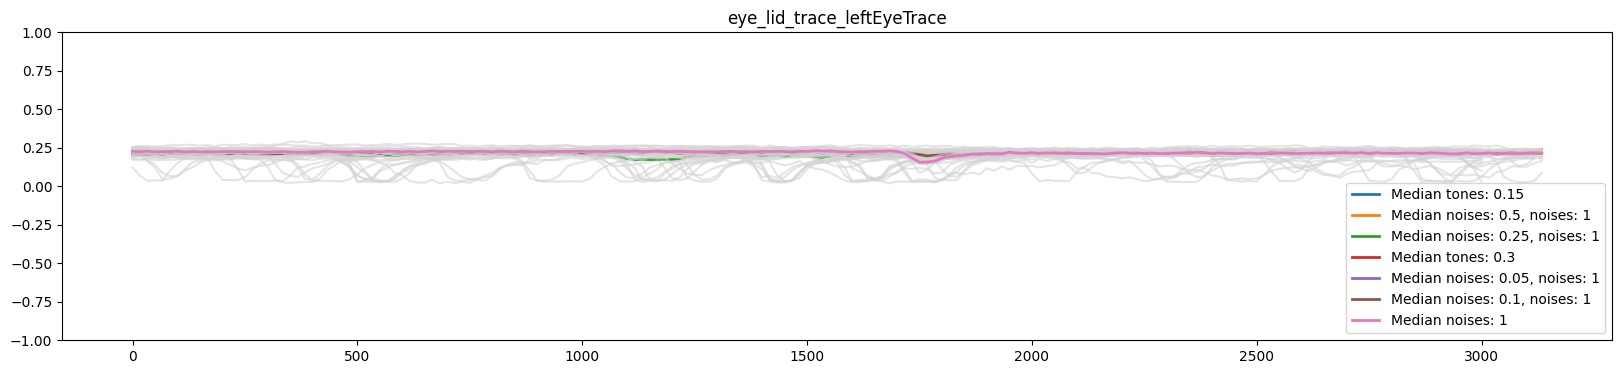

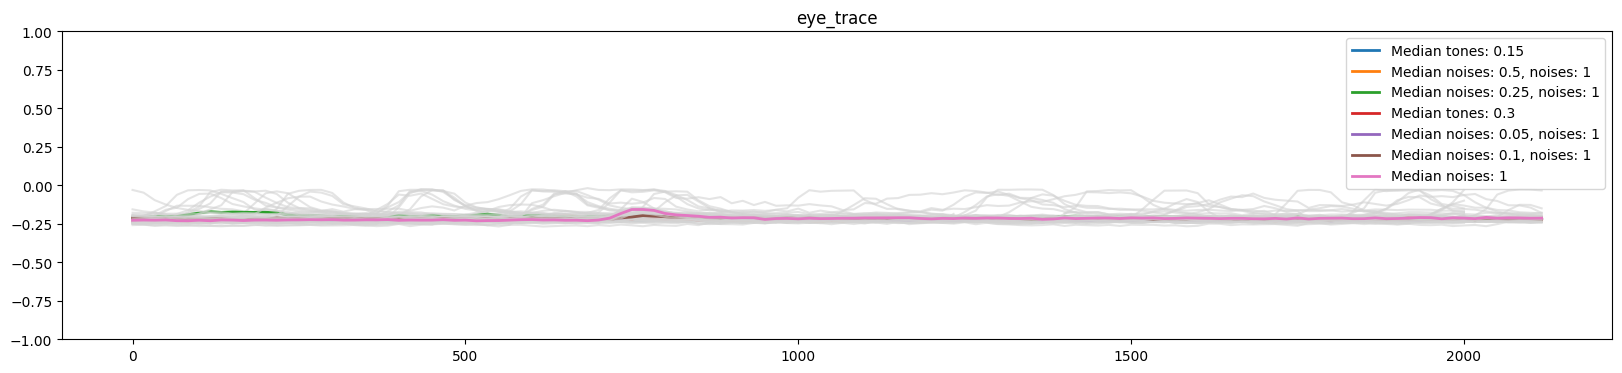

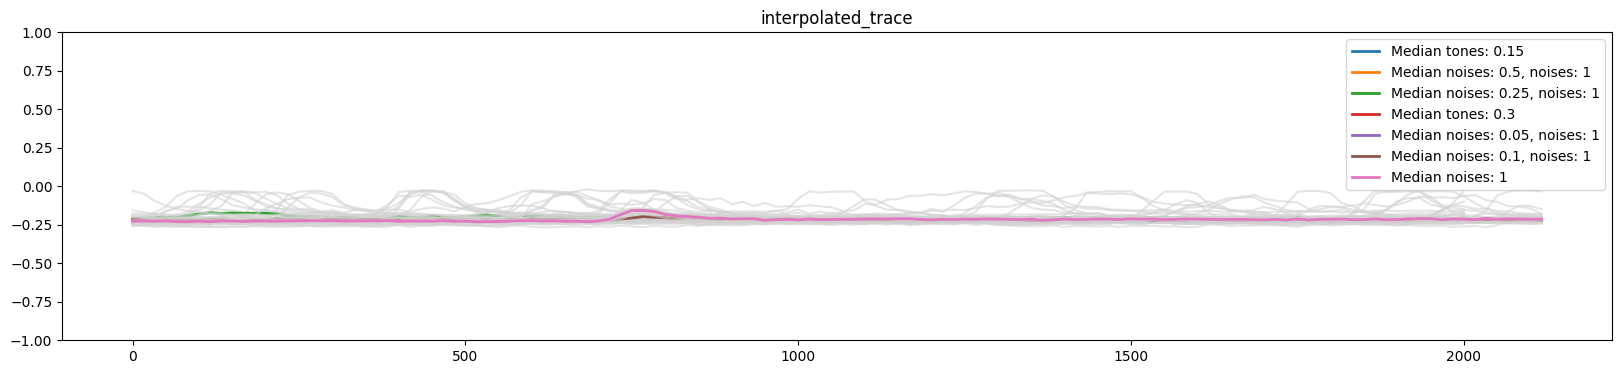

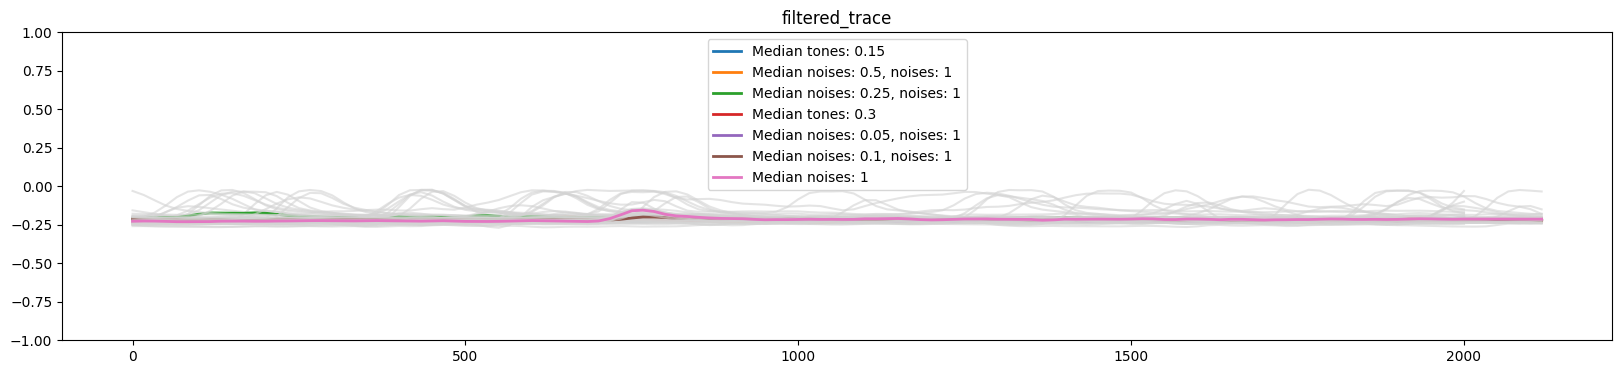

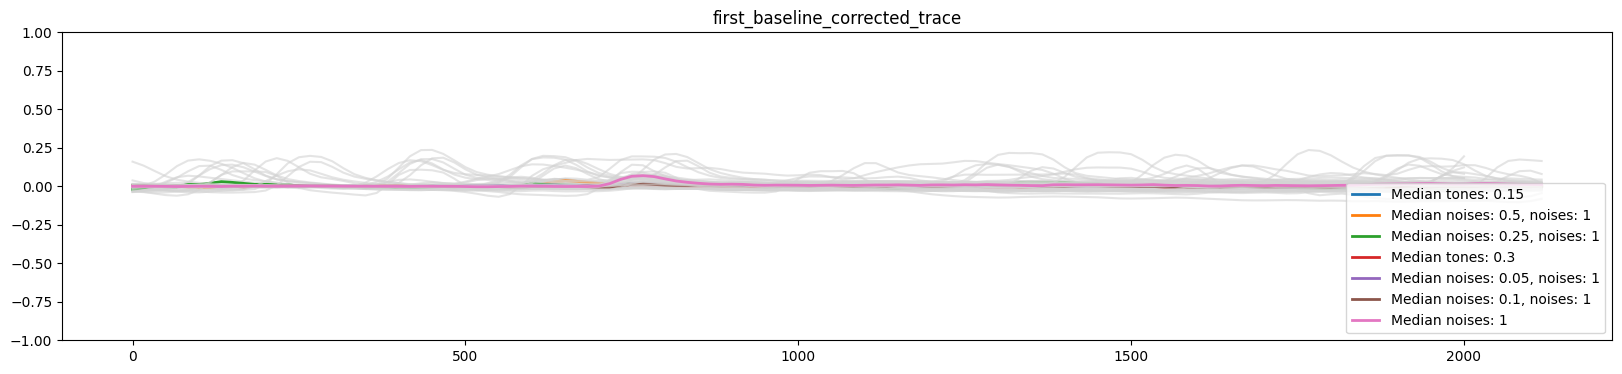

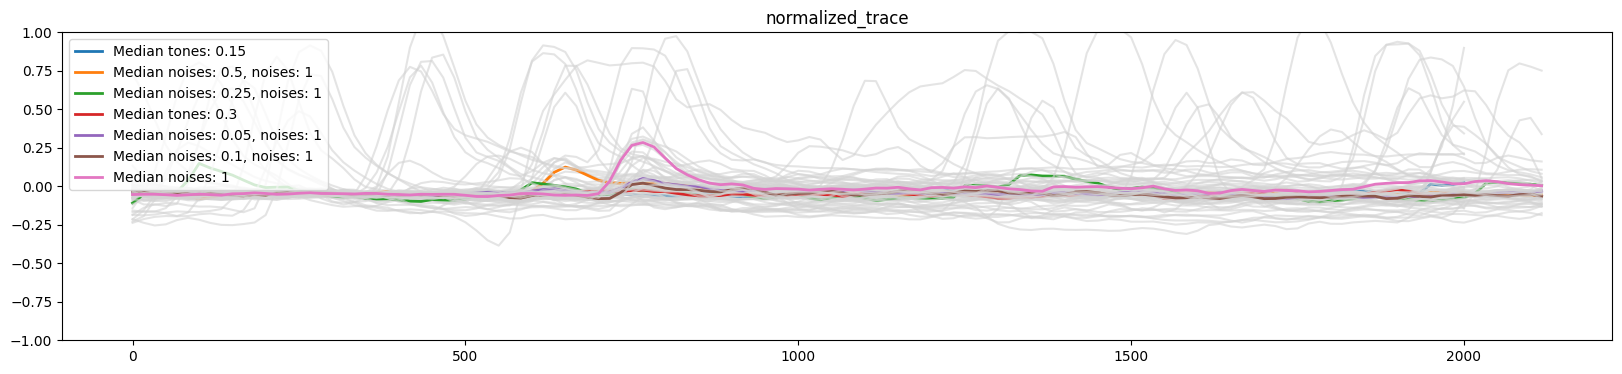

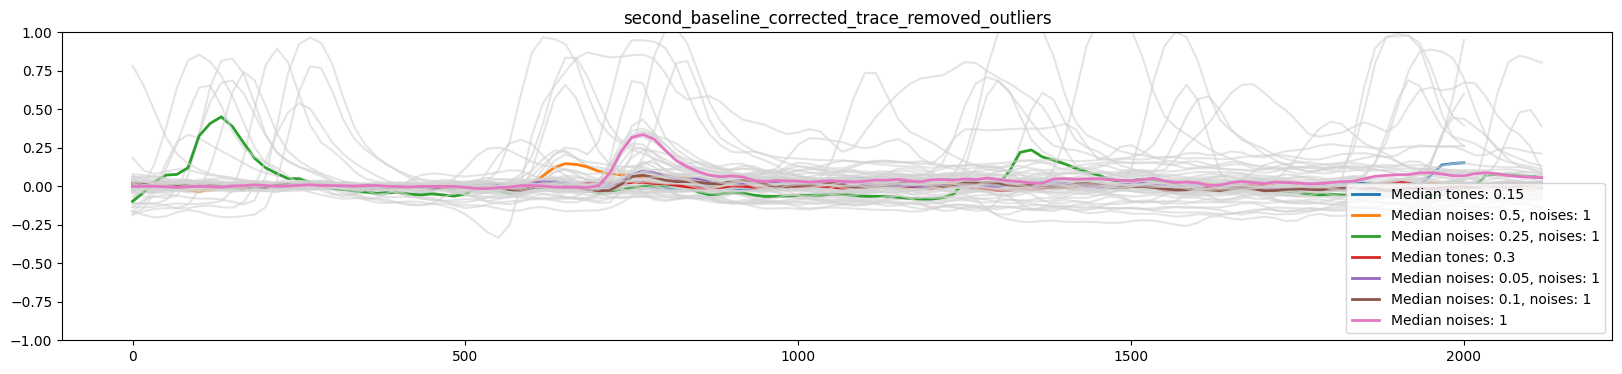

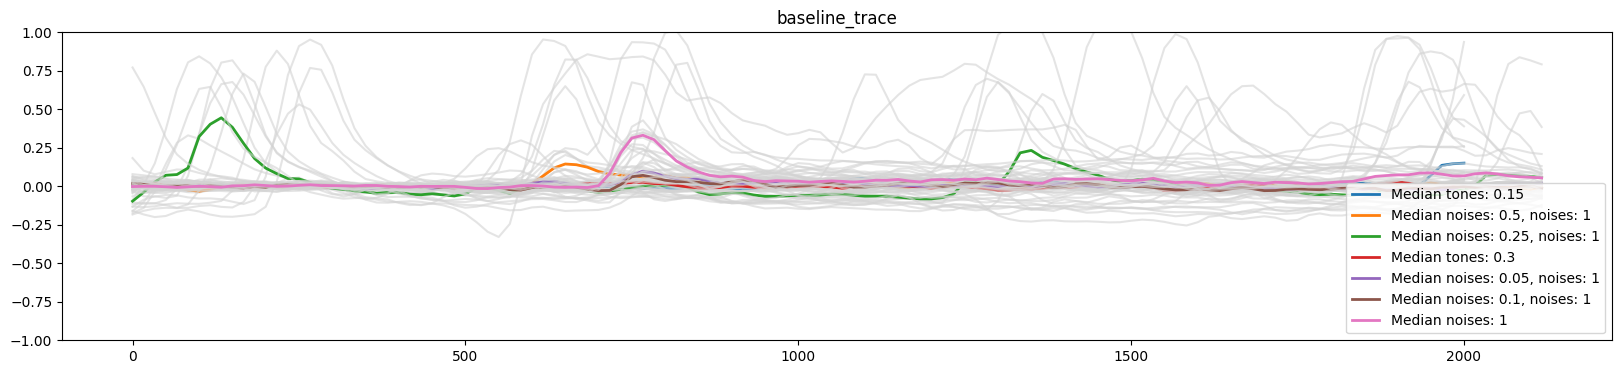

In [219]:
plot_median(df, 'eye_lid_trace_leftEyeTrace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'eye_trace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'interpolated_trace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'filtered_trace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'first_baseline_corrected_trace', 'proto_trial_hash', y_min=-1, y_max=1)
# plot_median(df, 'normalized_trace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'normalized_trace', 'proto_trial_hash', y_min=-1, y_max=1)
# plot_median(df, 'second_baseline_corrected_trace', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'second_baseline_corrected_trace_removed_outliers', 'proto_trial_hash', y_min=-1, y_max=1)
plot_median(df, 'baseline_trace', 'proto_trial_hash', y_min=-1, y_max=1)


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   proto_trial_content                               70 non-null     object 
 1   proto_trial_hash                                  70 non-null     object 
 2   eye_lid_trace_leftEyeTrace                        70 non-null     object 
 3   trial_sortOrder                                   70 non-null     int64  
 4   session_trials_id                                 70 non-null     int64  
 5   label                                             70 non-null     object 
 6   eye_trace                                         70 non-null     object 
 7   baseline_frames                                   70 non-null     int64  
 8   nan_percentage                                    70 non-null     float64
 9   trace_length           

In [210]:
df.head(200)

,proto_trial_content,proto_trial_hash,eye_lid_trace_leftEyeTrace,trial_sortOrder,session_trials_id,label,eye_trace,baseline_frames,nan_percentage,trace_length,min_trace_length,max_trace_length,interpolated_trace,filtered_trace,first_baseline_corrected_trace,first_normalized_trace,normalized_trace,second_baseline_corrected_trace,second_baseline_corrected_trace_removed_outliers,baseline_trace
0,"[{""type"":""noises"",""summary"":{""start"":120,""volu...",73ec755e3e63e0c1d3ca1570705d9bea,"0.44818,0.4408,0.44634,0.42539,0.43976,0.4427,...",1,755848,noises: 0.5,"[-0.44152, -0.44619, -0.44763, -0.43959, -0.44...",37,0.0,160.0,160,160,"[-0.44152, -0.44619, -0.44763, -0.43959, -0.44...","[-0.44152021312592626, -0.4458345939863657, -0...","[-0.0014305378835662852, -0.005744918744005734...","[-0.23476109349149485, -0.2522797196774167, -0...","[-0.23476109349149485, -0.2522797196774167, -0...",[-5.80872650e-03 -2.33273527e-02 -2.24641250e-...,"[-0.005808726498115702, -0.023327352684037517,...","[-0.004624833805841392, -0.018572940097785394,..."
1,"[{""type"":""noises"",""summary"":{""start"":120,""volu...",73ec755e3e63e0c1d3ca1570705d9bea,"0.44818,0.4408,0.44634,0.42539,0.43976,0.4427,...",1,755848,noises: 0.5,"[-0.44152, -0.44619, -0.44763, -0.43959, -0.44...",37,0.0,160.0,160,160,"[-0.44152, -0.44619, -0.44763, -0.43959, -0.44...","[-0.44152021312592626, -0.4458345939863657, -0...","[-0.0014305378835662852, -0.005744918744005734...","[-0.23476109349149485, -0.2522797196774167, -0...","[-0.23476109349149485, -0.2522797196774167, -0...",[-5.80872650e-03 -2.33273527e-02 -2.24641250e-...,"[-0.005808726498115702, -0.023327352684037517,...","[-0.004624833805841392, -0.018572940097785394,..."
2,"[{""type"":""noises"",""summary"":{""start"":120,""volu...",1af5b406214ca41f709fa5705a30106d,"0.38776,0.3882,0.39131,0.39233,0.3895,0.38412,...",2,755853,noises: 0.7,"[-0.39539, -0.39258, -0.38627, -0.38849, -0.38...",37,0.0,159.0,159,159,"[-0.39539, -0.39258, -0.38627, -0.38849, -0.38...","[-0.3953895039606453, -0.3914480686526117, -0....","[-0.008641399254233684, -0.004699963946200092,...","[-0.26404093431165815, -0.24803666069025115, -...","[-0.26404093431165815, -0.24803666069025115, -...",[-3.50885673e-02 -1.90842937e-02 -7.96295425e-...,"[-0.03508856731827892, -0.019084293696871923, ...","[-0.027937068888466268, -0.015194670755892942,..."
3,"[{""type"":""noises"",""summary"":{""start"":0,""volume...",c4e6a8fa7c274d3b4c313871b3d60189,"NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NAN,NA...",3,755852,"noises: 0.05, noises: 1",NaN,30,100.0,NaN,159,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{""type"":""noises"",""summary"":{""start"":0,""volume...",d659d231539a5fafe06d0788f4b552df,"0.13381,0.12042,0.16349,0.22035,0.23563,0.2830...",4,755849,"noises: 0.1, noises: 1","[-0.4148, -0.41967, -0.41935, -0.41839, -0.418...",30,0.0,159.0,159,160,"[-0.4148, -0.41967, -0.41935, -0.41839, -0.418...","[-0.4147996651162909, -0.41867193901143296, -0...","[0.008016169693508823, 0.004143895798366715, 0...","[-0.1964025562914114, -0.21212599867002158, -0...","[-0.1964025562914114, -0.21212599867002158, -0...",[ 3.25498107e-02 1.68263683e-02 1.24824476e-...,"[0.03254981070196772, 0.016826368323357488, 0....","[0.025915743314310156, 0.01339693942840075, 0...."
5,"[{""type"":""noises"",""summary"":{""start"":0,""volume...",d659d231539a5fafe06d0788f4b552df,"0.13381,0.12042,0.16349,0.22035,0.23563,0.2830...",4,755849,"noises: 0.1, noises: 1","[-0.4148, -0.41967, -0.41935, -0.41839, -0.418...",30,0.0,159.0,159,160,"[-0.4148, -0.41967, -0.41935, -0.41839, -0.418...","[-0.4147996651162909, -0.41867193901143296, -0...","[0.008016169693508823, 0.004143895798366715, 0...","[-0.1964025562914114, -0.21212599867002158, -0...","[-0.1964025562914114, -0.21212599867002158, -0...",[ 3.25498107e-02 1.68263683e-02 1.24824476e-...,"[0.03254981070196772, 0.016826368323357488, 0....","[0.025915743314310156, 0.01339693942840075, 0...."
6,"[{""type"":""noises"",""summary"":{""start"":0,""volume...",a